# Resolução do problema de condução de calor

In [4]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
# Função para plotar os curvas de nível constante de temperatura
def PlotaTemperature(n,m,T):
    x = np.arange(0, n, 1)
    y = np.arange(0, m, 1)
    X,Y=np.meshgrid(x,y)
    Z = np.copy(T)
    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_aspect('equal')
    ax.set(xlabel='x', ylabel='y', title='Contours of temperature')
    im = ax.contourf(X, Y, Z.T, 20, cmap='jet')
    im2 = ax.contour(X, Y, Z.T, 20, linewidths=0.25, colors='k')
    fig.colorbar(im, ax=ax)
    plt.show()

## Método de Jacobi

Converged in 1487 iterations



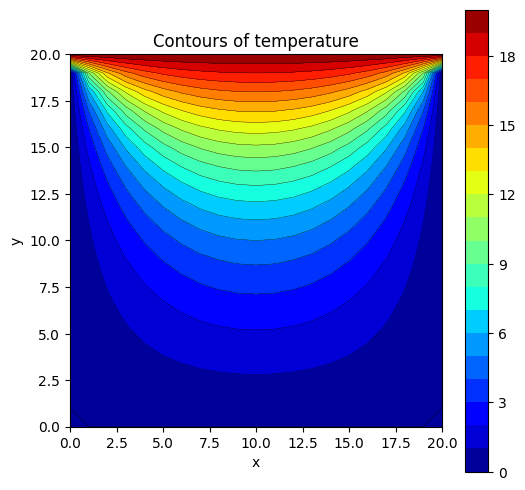

In [3]:
# Numero de pontos em cada direcao
N = 21 

Told = np.zeros(shape=(N,N))

# Temperaturas nas bordas
Told[0,  :] = 0.0 # TL
Told[N-1,:] = 0.0 # TR
Told[:,  0] = 0.0 # TB
Told[:,N-1] = 20.0 # TT

# Loop de iteracoes
Nmax = 10000
Tnew = Told.copy()
for iter in range(Nmax):
    Tnew[1:N-1,1:N-1] = 0.25*(Told[2:N,1:N-1] + Told[0:N-2,1:N-1] + \
                              Told[1:N-1,2:N] + Told[1:N-1,0:N-2])
    
    error = np.linalg.norm(Tnew-Told)
    #print(iter, '  ', error)
    if(error < 1.0e-8):
        print('Converged in %d iterations\n' %(iter))
        break ;
        
    Told = Tnew.copy()
    
PlotaTemperature(N,N,Tnew)

## Método de Gauss-Seidel

In [4]:
# Numero de pontos em cada direcao
N = 11 

Told = np.zeros(shape=(N,N))

# Temperaturas nas bordas
Told[0,  :] = 0.0 # TL
Told[N-1,:] = 0.0 # TR
Told[:,  0] = 0.0 # TB
Told[:,N-1] = 20.0 # TT

# Loop de iteracoes
Nmax = 10000
Tnew = Told.copy()
for iter in range(Nmax):
    for i in range(1,N-1):
        for j in range(1,N-1):
            Tnew[i,j] = 0.25*(Told[i+1,j] + Tnew[i-1,j] +\
                              Told[i,j+1] + Tnew[i,j-1])
    
    error = np.linalg.norm(Tnew-Told)
    #print(iter, '  ', error)
    if(error < 1.0e-8):
        print('Converged in %d iterations\n' %(iter))
        break ;
        
    Told = Tnew.copy()

Converged in 200 iterations



## Métodos com montagem explicíta da matriz

In [5]:
# Função para converter indice (i,j) a indice global Ic
def ij2n (i, j, N):
    return i + j*N

# Função para montar a matriz do sistema
def MatAssembly(N):
    nunk = N**2;
    A = np.zeros(shape=(nunk,nunk))
    for i in range(1,N-1):
        for j in range(1,N-1): 
            Ic = ij2n(i,   j,   N)
            Ie = ij2n(i+1, j,   N)
            Iw = ij2n(i-1, j,   N)
            In = ij2n(i,   j+1, N)
            Is = ij2n(i,   j-1, N)
            A[Ic,[Ic,Ie,Iw,In,Is]] = [4.0, -1.0, -1.0, -1.0, -1.0]
    return A

A = MatAssembly(4)
print(A, '\n')

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 

## Temperaturas nas borda

In [6]:
# Função para modificar a matriz e incorporar as condições de borda
def BuildSystem(A, N, TL, TR, TB, TT):
    nunk = N**2
    A = MatAssembly(N)
    Atilde = A.copy()
    b = np.zeros(shape=(nunk,1))
    k = np.array(range(0,N))
    Iden = np.identity(nunk)

    Ic = ij2n(0,k,N)
    Atilde[Ic,:], b[Ic] = Iden[Ic,:], TL # Tleft

    Ic = ij2n(N-1,k,N)
    Atilde[Ic,:], b[Ic] = Iden[Ic,:], TR # Tright

    Ic = ij2n(k,0,N)
    Atilde[Ic,:], b[Ic] = Iden[Ic,:], TB # Tbottom

    Ic = ij2n(k,N-1,N)
    Atilde[Ic,:], b[Ic] = Iden[Ic,:], TT # Ttop
    
    return Atilde, b

N = 41
Atilde, b = BuildSystem(A, N, TL=0.0, TR=0.0, TB=0.0, TT=20.0)
print(Atilde, '\n', b)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. 

## Condições de borda mantendo a simetria

0.0


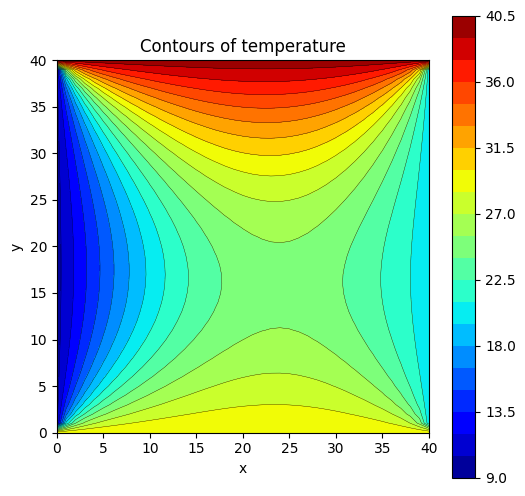

In [13]:
# Função para modificar a matriz e incorporar as condições de borda
def BuildSystemSim(N, TL, TR, TB, TT):
    nunk = N**2
    A = MatAssembly(N)
    Atilde = A.copy()
    b = np.zeros(shape=(nunk))
    k = np.array(range(0,N))
    Iden = np.identity(nunk)

    Ic = ij2n(0,k,N) # Tleft
    for r in k:
        b[:] = b[:] - A[:,Ic[r]]*TL 
    Atilde[Ic,:], b[Ic] = Iden[Ic,:], TL
    Atilde[:,Ic] = Iden[:,Ic] # completar aqui

    # Compĺetar o codigo para o resto das paredes
    #.
    #.
    #.
    
    return Atilde, b

N = 41
Atilde, b = BuildSystemSim(N, TL=10.0, TR=20.0, TB=30.0, TT=40.0)
print(np.linalg.norm(Atilde-Atilde.T))

import scipy
from scipy.linalg import solve 

T = scipy.linalg.solve(Atilde,b)
Tplot = T.copy().reshape(N,N).T
PlotaTemperature(N,N,Tplot)

## Resolvendo com métodos iterativos avançados

In [8]:
import scipy
from scipy.sparse import linalg
from scipy.sparse import csc_matrix
import time

class gmres_counter(object):
    def __init__(self, disp=True):
        self._disp = disp
        self.niter = 0
    def __call__(self, rk=None):
        self.niter += 1
        if self._disp:
            print('iter %3i\trk = %s' % (self.niter, str(rk)))
            
import inspect
class cg_counter(object):
    def __init__(self, disp=True):
        self._disp = disp
        self.niter = 0
    def __call__(self, rk=None):
        self.niter += 1
        frame = inspect.currentframe().f_back
        if self._disp:
            print('iter %3i\trk = %f' % (self.niter, frame.f_locals['resid']))

# Armar um caso de grande porte: Matriz densa   
N = 81
start_time = time.time()
Atilde, b = BuildSystemSim(N, TL=10.0, TR=20.0, TB=30.0, TT=40.0)
print("---Assembly: %s seconds ---" % (time.time() - start_time))


Atildesp = csc_matrix(Atilde)

# Examples of direct method (escalonamento)
print('\nMétodo direto\n')
start_time = time.time()
xsol_dir = scipy.sparse.linalg.spsolve(Atildesp,b)
print("---Tempo método Direto: %s seconds ---" % (time.time() - start_time))
            
# Example of conjugate gradient
print('\nMétodo iterativo CG')
start_time = time.time()
xsol_cg, info = scipy.sparse.linalg.cg(Atildesp, b, tol=1e-5, callback= cg_counter())
print("---Tempo método cg: %s seconds ---" % (time.time() - start_time))

# Example of Generalized minimum residual
print('\nMétodo iterativo GMRES')
start_time = time.time()
xsol_gmres, info = scipy.sparse.linalg.gmres(Atildesp, b, tol=1e-5, callback=gmres_counter())
print("---Tempo método gmres: %s seconds ---" % (time.time() - start_time))

---Assembly: 0.737433671951294 seconds ---

Método direto

---Tempo método Direto: 0.02892780303955078 seconds ---

Método iterativo CG
iter   1	rk = 406.808161
iter   2	rk = 182.203166
iter   3	rk = 142.413887
iter   4	rk = 127.845317
iter   5	rk = 133.914536
iter   6	rk = 102.805784
iter   7	rk = 80.521639
iter   8	rk = 74.751939
iter   9	rk = 77.995047
iter  10	rk = 70.783822
iter  11	rk = 57.989123
iter  12	rk = 52.829430
iter  13	rk = 53.994645
iter  14	rk = 53.062534
iter  15	rk = 45.883904
iter  16	rk = 41.219640
iter  17	rk = 40.883414
iter  18	rk = 41.695796
iter  19	rk = 38.011328
iter  20	rk = 34.142079
iter  21	rk = 32.839402
iter  22	rk = 33.823255
iter  23	rk = 32.256919
iter  24	rk = 29.364099
iter  25	rk = 27.548591
iter  26	rk = 28.149100
iter  27	rk = 27.743879
iter  28	rk = 25.845561
iter  29	rk = 23.886547
iter  30	rk = 23.973693
iter  31	rk = 24.075735
iter  32	rk = 23.049863
iter  33	rk = 21.230035
iter  34	rk = 20.863550
iter  35	rk = 21.059763
iter  36	rk = 20.6

iter 417	rk = 2.414178218234941e-05
iter 418	rk = 2.3866145332686598e-05
iter 419	rk = 2.3593684874764783e-05
iter 420	rk = 2.3296508290589223e-05
iter 421	rk = 2.3008516858704552e-05
iter 422	rk = 2.2748639625262813e-05
iter 423	rk = 2.2493269617072913e-05
iter 424	rk = 2.2235500110535293e-05
iter 425	rk = 2.1956394549551194e-05
iter 426	rk = 2.1658412571082236e-05
iter 427	rk = 2.1381651062436857e-05
iter 428	rk = 2.1098805769784138e-05
iter 429	rk = 2.0770743458570846e-05
iter 430	rk = 2.0455455568052842e-05
iter 431	rk = 2.0162146516455413e-05
iter 432	rk = 1.9855534799232093e-05
iter 433	rk = 1.95491418350822e-05
iter 434	rk = 1.9201117818523815e-05
iter 435	rk = 1.886308302774693e-05
iter 436	rk = 1.852636995695459e-05
iter 437	rk = 1.8194070399397465e-05
iter 438	rk = 1.7899615760799564e-05
iter 439	rk = 1.7645083758787027e-05
iter 440	rk = 1.7446416913229565e-05
iter 441	rk = 1.7253527655975176e-05
iter 442	rk = 1.7010166091471165e-05
iter 443	rk = 1.673801548701827e-05
iter 44